In [ ]:
##!pip install kagglehub

In [ ]:
#read marketing_sample_for_amazon_com-ecommerce_20200101_20200131__10k_data.csv
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/GenAI/final/final_data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#remove columns that are all NA values
df = df.dropna(axis=1, how='all')

In [ ]:
#drop columns: upc ean code, is amazon seller
df = df.drop(columns=['Upc Ean Code', 'Is Amazon Seller', 'Variants', 'Model Number'])

In [ ]:
df.head()

,Uniq Id,Product Name,Category,Selling Price,About Product,Product Specification,Technical Details,Shipping Weight,Product Dimensions,Image,Product Url
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",Sports & Outdoors | Outdoor Recreation | Skate...,$237.68,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,NaN,10.7 pounds,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/DB-Longboards-CoreFlex-...
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",Toys & Games | Learning & Education | Science ...,$99.95,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,The snap circuits mini kits classpack provides...,4 pounds,14.7 x 11.1 x 10.2 inches 4.06 pounds,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Electronic-Circuits-Cla...
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,Toys & Games | Arts & Crafts | Craft Kits,$34.99,Make sure this fits by entering your model num...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,show up to 2 reviews by default No longer are ...,12.8 ounces,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/3Doodler-Plastic-Innova...
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,Toys & Games | Hobbies | Models & Model Kits |...,$28.91,Make 8 different Planes at one time. | Experim...,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,Go to your orders and start the return Select ...,13.4 ounces,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Guillow-Airplane-Design...
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,Toys & Games | Puzzles | Jigsaw Puzzles,$17.49,Make sure this fits by entering your model num...,ProductDimensions:1.9x8x10inches|ItemWeight:13...,show up to 2 reviews by default 100% Officiall...,13.4 ounces,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Woodstock-Collage-500-p...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Uniq Id                10002 non-null  object
 1   Product Name           10002 non-null  object
 2   Category               9172 non-null   object
 3   Selling Price          9895 non-null   object
 4   About Product          9729 non-null   object
 5   Product Specification  8370 non-null   object
 6   Technical Details      9212 non-null   object
 7   Shipping Weight        8864 non-null   object
 8   Product Dimensions     479 non-null    object
 9   Image                  10002 non-null  object
 10  Product Url            10002 non-null  object
dtypes: object(11)
memory usage: 859.7+ KB


In [ ]:
#!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.8 MB/s eta 0:00:00


# Initiate Clip Model

In [ ]:
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
from tqdm import tqdm

from transformers import CLIPProcessor, CLIPModel
import torch

from langchain_community.vectorstores import Chroma
from langchain.schema import Document

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
def combine_fields(row):
    fields = [
        row.get("Product Name", ""),
        row.get("Category", ""),
        row.get("Selling Price", ""),
        row.get("About Product", ""),
        row.get("Product Specification", ""),
        row.get("Technical Details", ""),
        row.get("Shipping Weight", ""),
    ]
    return " | ".join(str(f).strip() for f in fields if pd.notna(f))

def download_image(url):
    try:
        response = requests.get(url, timeout=10)
        img = Image.open(BytesIO(response.content)).convert("RGB")
        return img
    except Exception as e:
        print(f"Failed to fetch image: {e}")
        return None

def get_clip_embedding(text, image):
    # Process text only
    text_inputs = clip_processor(text=[text], return_tensors="pt", truncation=True).to(device)
    with torch.no_grad():
        text_features = clip_model.get_text_features(**text_inputs)

    # Process image only
    image_inputs = clip_processor(images=image, return_tensors="pt").to(device)
    with torch.no_grad():
        image_features = clip_model.get_image_features(**image_inputs)

    # Combine
    return (text_features + image_features)[0].cpu().numpy()

# Create Embeddings

In [ ]:
docs = []
embeddings = []

for _, row in tqdm(df.iterrows(), total=len(df)):
    text = combine_fields(row)
    image = download_image(row["Image"])
    if image and text:
        embedding = get_clip_embedding(text, image)
        doc = Document(page_content=text, metadata={"source": row["Image"]})
        docs.append(doc)
        embeddings.append(embedding)

  5%|▍         | 463/10002 [04:53<1:28:31,  1.80it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9ae488d760>


  5%|▍         | 497/10002 [05:21<1:25:33,  1.85it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9ae488f510>


  8%|▊         | 797/10002 [08:23<1:09:45,  2.20it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adfe8b470>


 19%|█▉        | 1950/10002 [19:22<1:18:13,  1.72it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9ae4572e80>


 22%|██▏       | 2185/10002 [21:37<1:14:23,  1.75it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adfefd9e0>


 23%|██▎       | 2323/10002 [22:58<58:01,  2.21it/s]  

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adfd14f90>


 35%|███▍      | 3468/10002 [34:04<57:01,  1.91it/s]  

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adfdb7a60>


 36%|███▌      | 3553/10002 [34:50<48:41,  2.21it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adfd794e0>


 37%|███▋      | 3739/10002 [36:40<48:43,  2.14it/s]  

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adfc76b10>


 49%|████▉     | 4927/10002 [48:19<36:35,  2.31it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adfb76430>


 53%|█████▎    | 5295/10002 [51:49<34:41,  2.26it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adfbd9490>


 54%|█████▍    | 5382/10002 [52:39<33:43,  2.28it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adfa040e0>


 55%|█████▍    | 5493/10002 [53:51<4:12:05,  3.35s/it]

Failed to fetch image: HTTPSConnectionPool(host='images-na.ssl-images-amazon.com', port=443): Read timed out. (read timeout=10)


 61%|██████    | 6124/10002 [1:00:00<34:22,  1.88it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adfa80540>


 65%|██████▌   | 6518/10002 [1:04:05<26:40,  2.18it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adf901e40>


 69%|██████▉   | 6938/10002 [1:08:30<28:13,  1.81it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adf99e8e0>


 70%|██████▉   | 6975/10002 [1:08:51<22:16,  2.26it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adf95c3b0>


 70%|███████   | 7035/10002 [1:09:30<18:54,  2.61it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adf99ede0>


 73%|███████▎  | 7329/10002 [1:12:30<23:10,  1.92it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adf9be4d0>


 75%|███████▌  | 7507/10002 [1:14:15<18:19,  2.27it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adf9fed90>


 76%|███████▌  | 7589/10002 [1:15:01<16:31,  2.43it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adf9fd5d0>


 79%|███████▉  | 7931/10002 [1:18:25<17:14,  2.00it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adf880310>


 80%|███████▉  | 7965/10002 [1:18:43<15:25,  2.20it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adf8553f0>


 81%|████████  | 8053/10002 [1:19:39<13:20,  2.43it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adf880f90>


 82%|████████▏ | 8239/10002 [1:21:23<11:32,  2.55it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adf8a8db0>


 84%|████████▍ | 8416/10002 [1:23:00<11:47,  2.24it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adf8ab510>


 87%|████████▋ | 8744/10002 [1:26:17<12:09,  1.72it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adf8f1e90>


 87%|████████▋ | 8748/10002 [1:26:19<08:54,  2.35it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adf728cc0>


 88%|████████▊ | 8785/10002 [1:26:41<12:03,  1.68it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adf7295d0>


 90%|█████████ | 9037/10002 [1:29:14<06:29,  2.48it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adf758590>


 91%|█████████ | 9061/10002 [1:29:27<06:03,  2.59it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adf759170>


 96%|█████████▌| 9578/10002 [1:34:18<03:03,  2.31it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adf7fb100>


100%|█████████▉| 9969/10002 [1:37:48<00:19,  1.67it/s]

Failed to fetch image: cannot identify image file <_io.BytesIO object at 0x7e9adf6569d0>


100%|██████████| 10002/10002 [1:38:07<00:00,  1.70it/s]


Save Embeddings

In [ ]:
import pickle

with open("/content/drive/MyDrive/GenAI/final/embeddings.pkl", "wb") as f:
    pickle.dump(embeddings, f)

with open("/content/drive/MyDrive/GenAI/final/docs.pkl", "wb") as f:
    pickle.dump(docs, f)

print("Saved to Google Drive!")

Saved to Google Drive!


Load Embeddings

In [ ]:
import pickle

with open("/content/drive/MyDrive/GenAI/final/embeddings.pkl", "rb") as f:
    embeddings = pickle.load(f)

with open("/content/drive/MyDrive/GenAI/final/docs.pkl", "rb") as f:
    docs = pickle.load(f)

In [ ]:
#!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 25.0 MB/s eta 0:00:00


In [ ]:
import faiss
import numpy as np
from langchain_community.vectorstores import FAISS
from langchain_community.docstore import InMemoryDocstore
from langchain.schema import Document


# Build Vector Store

In [ ]:
# Step 1: Build FAISS index
dimension = embeddings[0].shape[0]
index = faiss.IndexFlatL2(dimension)
index.add(np.stack(embeddings))

# Step 2: Create metadata store (docstore)
docstore = InMemoryDocstore({str(i): doc for i, doc in enumerate(docs)})

# Step 3: Create LangChain FAISS vector store
vectorstore = FAISS(
    index=index,
    docstore=docstore,
    index_to_docstore_id={i: str(i) for i in range(len(docs))},
    embedding_function=None
)

# Save the vectorstore
vectorstore.save_local("notebook_faiss_test")
print("FAISS vectorstore saved!")


FAISS vectorstore saved!


# Text-Based Question

In [ ]:
from IPython.display import display, Image as IPImage
import requests
from io import BytesIO

def format_chatbot_response(query_text=None, query_image=None):
    # Get embedding
    if query_text:
        text_inputs = clip_processor(text=[query_text], return_tensors="pt", truncation=True).to(device)
        with torch.no_grad():
            text_features = clip_model.get_text_features(**text_inputs)
        query_embedding = text_features[0].cpu().numpy()
    elif query_image:
        image_inputs = clip_processor(images=query_image, return_tensors="pt").to(device)
        with torch.no_grad():
            image_features = clip_model.get_image_features(**image_inputs)
        query_embedding = image_features[0].cpu().numpy()
    else:
        print("Provide a text or image query.")
        return

    # Retrieve top 3 products
    results = vectorstore.similarity_search_by_vector(query_embedding, k=3)

    # 🗨️ Print Chatbot Answer
    print("\n💬 **Chatbot Answer:**")
    if query_text:
        print(f"Here’s what I found based on your question: '{query_text}'.")
        print(f"For example, this product might match your interest: {results[0].page_content}")
    elif query_image:
        print("Here’s what I can tell about this product based on the image.")
        print(f"It might be: {results[0].page_content}")

    # 🛍️ Print Related Products
    print("\n🔍 **Related Products:**\n")
    for i, r in enumerate(results):
        print(f"**Result {i+1}:**")
        print(f"**Description:** {r.page_content}")
        if "source" in r.metadata:
            image_url = r.metadata["source"]
            print(f"**Image URL:** {image_url}")
            try:
                response = requests.get(image_url, timeout=5)
                img = Image.open(BytesIO(response.content))
                display(img)
            except:
                print("Could not display image.")
        print("\n")


💬 **Chatbot Answer:**
Here’s what I found based on your question: 'board games?'.
For example, this product might match your interest: Stronghold Games Flee Board Games | Toys & Games | Games & Accessories | Board Games | $14.05 | Make sure this fits by entering your model number. | 1 to 4 players | 75 minutes playtime | Ages 12 and up | ProductDimensions:5.3x1.6x5.3inches|ItemWeight:10.6ounces|ShippingWeight:10.6ounces(Viewshippingratesandpolicies)|DomesticShipping:ItemcanbeshippedwithinU.S.|InternationalShipping:Thisitemisnoteligibleforinternationalshipping.LearnMore|ASIN:B075ZF2WBZ|Itemmodelnumber:6016SG|Manufacturerrecommendedage:12yearsandup | "Quickly, we must flee!", you tell your companions. "The monster is almost upon us! look to all sides for help, as you never know where it will be!" can your team survive long enough to finish all chapters of this exciting story? flee is a cooperative game of escaping for ambitious puzzle solvers. You start a fast forward game without readi

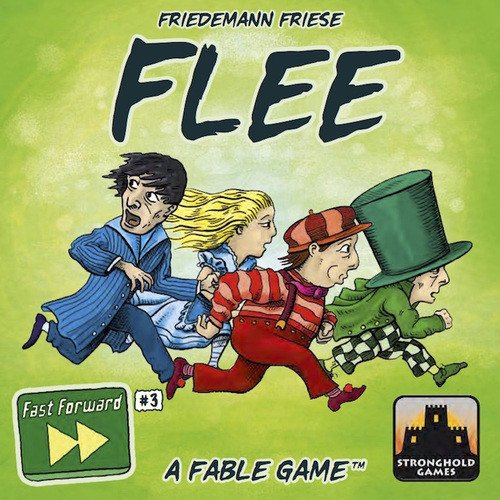



**Result 2:**
**Description:** R and R Games Time's Up | Toys & Games | Games & Accessories | Board Games | $19.99 | Make sure this fits by entering your model number. | For 3+ players | 60 minute playing time | Winner of over 20 awards including Mensa select and game of the year | Huge number of names included to ensure constant variety in play | New expansion packs coming soon! | ProductDimensions:8.5x2.8x10.5inches|ItemWeight:2pounds|ShippingWeight:2.16pounds(Viewshippingratesandpolicies)|DomesticShipping:ItemcanbeshippedwithinU.S.|InternationalShipping:ThisitemcanbeshippedtoselectcountriesoutsideoftheU.S.LearnMore|ASIN:B074JFP3C7|Itemmodelnumber:975|Manufacturerrecommendedage:13yearsandup | Go to your orders and start the return Select the ship method Ship it! | Go to your orders and start the return Select the ship method Ship it! | The fast paced guess-who-i-am game! our hottest party game comes with the best of the original game and a huge collection of all new names! for adde

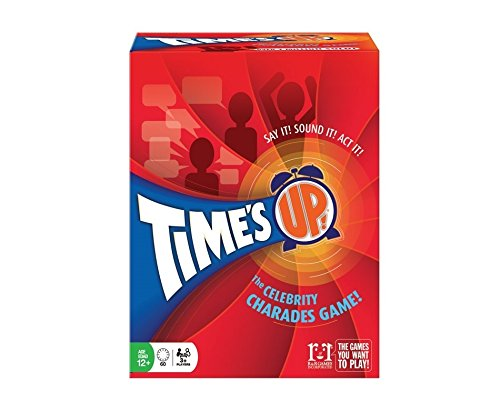



**Result 3:**
**Description:** 15 Men | Toys & Games | Games & Accessories | Board Games | $24.95 | Make sure this fits by entering your model number. | During the game Each player will try to corrupt some of the sailors that has not taken yet a side. | But each Sailor has also a unique ability that who corrupts can use to change the cards on the table… | Once all the doubloons will be spent, then some of the Pirates could be killed in a gunfight, then the team with more victory points will take control of the vessel... And for the other there will be just the trampoline and the sharks… | ProductDimensions:8.3x8.3x2inches|ItemWeight:1.27pounds|ShippingWeight:1.27pounds(Viewshippingratesandpolicies)|ASIN:B081KFRGJD|Itemmodelnumber:PG505|Manufacturerrecommendedage:14yearsandup | Go to your orders and start the return Select the ship method Ship it! | Go to your orders and start the return Select the ship method Ship it! | show up to 2 reviews by default In 15 men (on a dead man's chest

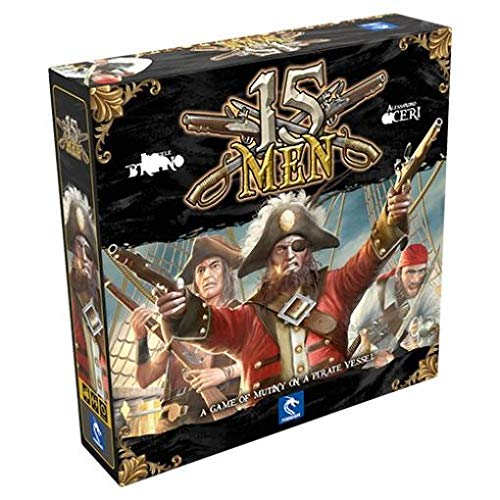

In [ ]:
format_chatbot_response(query_text="board games?")

# Image-Based Question

In [ ]:
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display

def format_image_based_response(query_image):
    if not query_image:
        print("❗Please upload an image to get a response.")
        return

    # Get embedding for the image
    image_inputs = clip_processor(images=query_image, return_tensors="pt").to(device)
    with torch.no_grad():
        image_features = clip_model.get_image_features(**image_inputs)
    query_embedding = image_features[0].cpu().numpy()

    # Retrieve similar products
    results = vectorstore.similarity_search_by_vector(query_embedding, k=3)

    # Format chatbot answer
    print("\n **Chatbot Answer:**")
    print("Here’s what I can tell about this product based on the image:")
    print(f"It might be: {results[0].page_content}")

    # Display related products
    print("\n **Related Products:**\n")
    for i, r in enumerate(results):
        print(f"**Result {i+1}:**")
        print(f"**Description:** {r.page_content}")
        if "source" in r.metadata:
            image_url = r.metadata["source"]
            print(f"**Image URL:** {image_url}")
            try:
                response = requests.get(image_url, timeout=5)
                img = Image.open(BytesIO(response.content))
                display(img)
            except:
                print("Could not display image.")
        print("\n")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Untitled.png to Untitled.png



 **Chatbot Answer:**
Here’s what I can tell about this product based on the image:
It might be: Peppa Pig Shape Sorter Clock Puzzle (12Piece) | Toys & Games | Baby & Toddler Toys | Teaching Clocks | $11.88 | Make sure this fits by entering your model number. | The removable, brightly colored wooden shapes with numbers printed beneath the shapes allow for greater interaction and ease of matching | With this shape sorter clock, learning to tell time is made fun and simple! | 12 die-cut wooden shapes, clock face labeled with hours and minutes, wooden clock stand and bright fun colors with smooth edges | ProductDimensions:0.9x8.5x8.5inches|ItemWeight:9.1ounces|ShippingWeight:11.2ounces(Viewshippingratesandpolicies)|DomesticShipping:ItemcanbeshippedwithinU.S.|InternationalShipping:ThisitemcanbeshippedtoselectcountriesoutsideoftheU.S.LearnMore|ASIN:B015EOHBKI|Itemmodelnumber:68008|Manufacturerrecommendedage:36months-4years | show up to 2 reviews by default Peppa Pig Shape Sorter Clock Puzzl

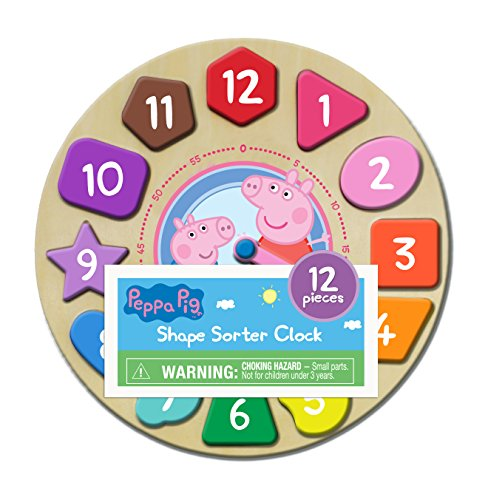



**Result 2:**
**Description:** VTech Tummy Time Discovery Pillow | Toys & Games | Baby & Toddler Toys | Activity Play Centers | $24.96 | Make sure this fits by entering your model number. | Provides comfortable support for your baby during tummy time, which is key in the development of important motor skills | Supports your baby while they are learning to sit on their own | Great for take-along play as your child grows | Light-up piano keys introduce colors and objects, and play music and short tunes, developing fine motor skills and providing auditory stimulation | ProductDimensions:3.9x15.8x27.2inches|ItemWeight:1pounds|ShippingWeight:1.4pounds(Viewshippingratesandpolicies)|DomesticShipping:ItemcanbeshippedwithinU.S.|InternationalShipping:ThisitemcanbeshippedtoselectcountriesoutsideoftheU.S.LearnMore|ASIN:B06WP31RCV|Itemmodelnumber:80-506800|Manufacturerrecommendedage:0-2years|Batteries:3AAAbatteriesrequired.(included) | Go to your orders and start the return Select the ship method

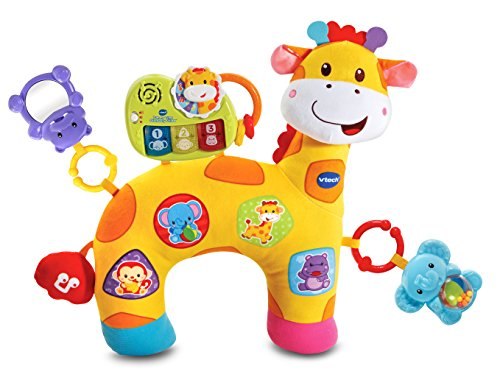



**Result 3:**
**Description:** Fisher Price Classic Toys - The Farmer Says See 'N Say - Great Pre-School Gift for Girls and Boys | Toys & Games | Baby & Toddler Toys | $21.00 | Make sure this fits by entering your model number. | Looks, sounds and plays just like you remember! | Point the arrow to the animal of your choice and pull the cord | Hear the Farmer name the animal and the sound it makes! | Features 12 classic animal sounds | Helps kids learn to identify animals by picture, name and sound | Makes a great gift for babies and toddlers ages 18 months and up for hands-on, screen-free play!! | ProductDimensions:8x1.8x9.5inches|ItemWeight:1.2pounds|ShippingWeight:1.23pounds(Viewshippingratesandpolicies)|DomesticShipping:ItemcanbeshippedwithinU.S.|InternationalShipping:ThisitemcanbeshippedtoselectcountriesoutsideoftheU.S.LearnMore|ASIN:B00IVJK8Y0|Itemmodelnumber:2070|Manufacturerrecommendedage:18months-5years|Batteries:2AAbatteriesrequired.(included) | Go to your orders and start t

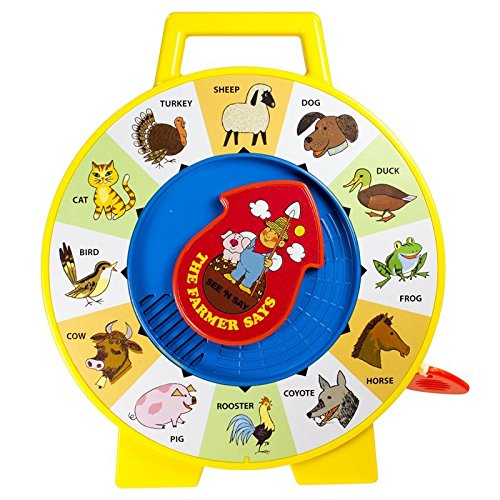

In [ ]:
from PIL import Image

query_image = Image.open("Untitled.png").convert("RGB")
format_image_based_response(query_image)


# Request Specific Product Image

In [ ]:
def request_specific_product_image(query_text):
    # Generate embedding for text query
    prompt = f"A product image of {query_text}."
    text_inputs = clip_processor(text=[prompt], return_tensors="pt", truncation=True).to(device)
    with torch.no_grad():
        text_features = clip_model.get_text_features(**text_inputs)
    query_embedding = text_features[0].cpu().numpy()

    # Retrieve top product
    results = vectorstore.similarity_search_by_vector(query_embedding, k=1)

    # Chatbot Response
    print("\n💬 **Chatbot Answer:**")
    print(f"Sure, here is an image of the {query_text}:\n")

    # Display Image and Description
    for r in results:
        if "source" in r.metadata:
            image_url = r.metadata["source"]
            print(f"**Image URL:** {image_url}")
            try:
                response = requests.get(image_url, timeout=5)
                img = Image.open(BytesIO(response.content))
                display(img)
            except:
                print("⚠️ Could not display image.")

        print(f"**Product Description:** {r.page_content}")
        print("\n")



💬 **Chatbot Answer:**
Sure, here is an image of the Peppa Pig Clock:

**Image URL:** https://images-na.ssl-images-amazon.com/images/I/519BaFjimBL.jpg|https://images-na.ssl-images-amazon.com/images/I/51vOIUMj0ML.jpg|https://images-na.ssl-images-amazon.com/images/I/51QRaxeSHcL.jpg|https://images-na.ssl-images-amazon.com/images/G/01/x-locale/common/transparent-pixel.jpg


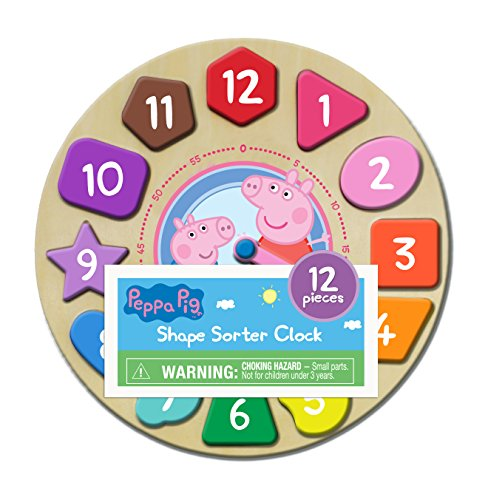

**Product Description:** Peppa Pig Shape Sorter Clock Puzzle (12Piece) | Toys & Games | Baby & Toddler Toys | Teaching Clocks | $11.88 | Make sure this fits by entering your model number. | The removable, brightly colored wooden shapes with numbers printed beneath the shapes allow for greater interaction and ease of matching | With this shape sorter clock, learning to tell time is made fun and simple! | 12 die-cut wooden shapes, clock face labeled with hours and minutes, wooden clock stand and bright fun colors with smooth edges | ProductDimensions:0.9x8.5x8.5inches|ItemWeight:9.1ounces|ShippingWeight:11.2ounces(Viewshippingratesandpolicies)|DomesticShipping:ItemcanbeshippedwithinU.S.|InternationalShipping:ThisitemcanbeshippedtoselectcountriesoutsideoftheU.S.LearnMore|ASIN:B015EOHBKI|Itemmodelnumber:68008|Manufacturerrecommendedage:36months-4years | show up to 2 reviews by default Peppa Pig Shape Sorter Clock Puzzle (12Piece) | 11.2 ounces (View shipping rates and policies) | 11.2 ounc

In [ ]:
request_specific_product_image("Peppa Pig Clock")